## Cross-validation
- Cross-validation is a statistical method to evaluate generalization performance in a
more stable and thorough way than using a split into training and test set.
In cross-validation, instead of splitting the data set in to a training set and a test set,
the data is split repeatedly and multiple models are trained.
The most commonly used version of cross-validation is k-fold cross-validation, where
k is a user specified number, usually five or ten. When performing five-fold crossvalidation, the data is first partitioned into five parts of (approximately) equal size,
called folds.

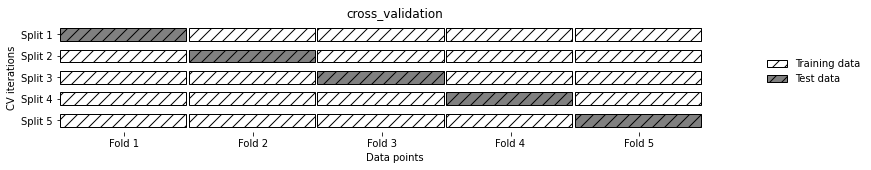

In [1]:
import mglearn

mglearn.plots.plot_cross_validation()


## Cross-validation Implementation in scikit-learn
- Cross-validation is implemented in scikit-learn using the cross_val_score function
from the model_selection module.
The parameters of the cross_val_score function are the model we want to evaluate,
the training data and the ground-truth labels.

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score,
                            accuracy_score,
                            recall_score,
                            f1_score)


In [2]:
path = "/Users/kehindeajayi01/Downloads/telecom_churn.csv"

df = pd.read_csv(path)

df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Select features and target

In [3]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

### Implement cross validation

In [5]:
gb = GradientBoostingClassifier(random_state=0)

score = cross_val_score(gb, X, y, scoring="recall", cv = 5)

In [7]:
np.mean(score)

0.6563144329896907

In [4]:
from models import train, evaluate

### Split the dataset into training and test data

In [5]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y,
                                                           test_size = 0.2,
                                                           random_state=0,
                                                           stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, 
                                                 y_train_val, 
                                                  test_size = 0.2,
                                                 random_state=0,
                                                 stratify= y_train_val
                                                 )

### Balance the dataset

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)

x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

### Important note
- It is important to keep in mind that cross-validation is not a way to build a
model that can be applied to new data. Cross-validation does not return a model.
When calling cross_val_score, multiple models are build internally, but the purpose
of cross-validation is only to evaluate how well a given algorithm will generalize when
trained on a specific dataset. 

## Stratified K-Fold Cross-validation
- Splitting the dataset into k-folds by starting with the first 1/k-th part of the data as
described above might not always be a good idea.


-  In stratified cross-validation, we split
the data such that the proportions between classes are the same in each fold as they
are in the whole dataset, as illustrated in the Figure below:

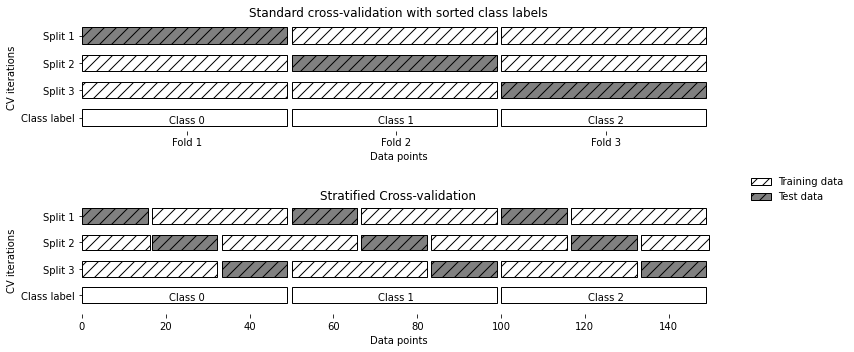

In [7]:
mglearn.plots.plot_stratified_cross_validation()

### Implementing the standard KFold cross-validation in scikit-learn
- By default, scikit-learn uses the standard kfold for regression problems, and stratified kfold for classification problems.
However, we can still initiate the standard kfold for classification problems, even though it is bad idea.


In [11]:
from sklearn.model_selection import KFold

# instantiate it
kfold = KFold(n_splits=5, shuffle=True)

# create an instance of the Gradient Boosting model
gb1 = GradientBoostingClassifier(random_state=0)

# assign the kfold splitter to the cv parameter in the cross_val_score
score1 = cross_val_score(gb1, X, y, cv = kfold, scoring = "recall")

print("KFold scores: {}".format(score1))

KFold scores: [0.56043956 0.65137615 0.72093023 0.68421053 0.67647059]


#### We can also shuffle the classes for kfold cross-validation

In [10]:
# another way to resolve the issue of standard KFold is to set the shuffle parameter to True
# kfold = KFold(n_splits = 3, shuffle=True, random_state = 0)

# scores = cross_val_score(gb, x_train_sm, y_train_sm, cv = kfold, scoring = "recall")

# print("KFold scores with shuffle: {}".format(scores))

## Leave-One-Out cross-validation
- Another frequently used cross-validation method is leave-one-out. You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample. For each split, you pick a single data point to be the test set. This can be very
time-consuming, in particular for large datasets, but sometimes provides better estimates on small datasets.

In [ ]:
# from sklearn.model_selection import LeaveOneOut

# loo = LeaveOneOut()

# # assign the loo splitter to the cross_val_score
# scores = cross_val_score(gb, x_train, y_train, cv = loo, scoring = "recall")

# print("Number of iterations: {}".format(len(scores)))
# print("Leave-One-Out mean score: {}".format(scores.mean()))

## Hyperparameter Tuning
- Here, we discuss how to improve the model's generalization performance by tuning its parameters. The two most common methods 
are:
    - **Grid search**
    - **Randomized search**

    
### Grid Search
- This means trying all possible combinations of the parameters of interest. Consider the case Gradient Boosting. As we discussed in the last class, there are two important parameters: the max_depth and learning_rate. Say we want to try values 0.001, 0.01, 0.1, 1 and 10 for the parameter learning_rate, and 1 through 4 for max_depth. Because we have five different settings for learning_rate and 4 for max_depth that we want to try, we have 20 combinations of parameters in total.

### Simple Grid Search
- We can implement a simple grid-search just as for-loops over the two parameters,
training and evaluating a classifier for each combination:

## Manual grid search

In [ ]:
# loop through the combination values of both parameters
best_score = 0
best_parameters = {}
for lr in [0.001, 0.01, 0.1, 1, 10]:
    for md in range(1, 5):
        gb = GradientBoostingClassifier(random_state=0, learning_rate=lr, max_depth=md)
        gb.fit(x_train, y_train)
        score = gb.score(x_val, y_val)
        
        if score > best_score:
            best_score = score
            best_parameters = {'Learning_rate': lr, 'Max_depth': md}

print("Best score: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))

## The dangers of overfitting the parameters and the validation set
- The accuracy we got above may be overly optimistic and not reflect the actually performance on new data because,
we used the test set to select the parameter values.


- In reality, it is best to split our data into training, validation, and test sets, so that we use the training to
build the model, select the parameters with the validation set, and evaluate the model with the selected parameters with
the test set.

In [ ]:
mglearn.plots.plot_threefold_split()

## Implementing Grid Search in scikit-learn
- To use the GridSearchCV class, you first need to specify the
parameters you want to search over using a dictionary. GridSearchCV will then perform 
all the necessary model fits. The keys of the dictionary are the names of parameters 
we want to adjust (as given when constructing the model), in this case C and
gamma, and the values are the parameter settings we want to try out.

In [74]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gb2 = GradientBoostingClassifier(random_state=0)
# set the parameters to tune
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1, 2, 3, 4]}

# instantiate the models and grid search
grid = RandomizedSearchCV(gb2, param_grid, cv = 5, n_jobs = -1, scoring = "f1")


# fit the grid search model on the training set
grid.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'max_depth': [1, 2, 3, 4]},
                   scoring='f1')

In [75]:
best_params = grid.best_params_


In [76]:
best_params


{'max_depth': 4, 'learning_rate': 0.1}

In [77]:
grid.best_score_


0.7061334293382975

In [78]:
gb_imp = GradientBoostingClassifier(**best_params, random_state=0)

gb_imp_model = train(gb_imp, x_train, y_train)


Train Accuracy: 0.9727954971857411


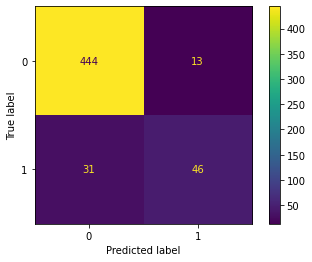

,Accuracy,Precision,Recall,F1
0,0.917603,0.779661,0.597403,0.676471


In [79]:
gb_imp_df = evaluate(gb_imp_model, x_val, y_val)

gb_imp_df


## Automatic Hyperparameter Tuning
- Here, we will be using the hyperopt package to automatically search for the best model and hyperparameters.

In [ ]:
#pip install hyperopt

In [ ]:
#!git clone https://github.com/jaberg/hyperopt.git

### What is Hyperopt
- Hyperopt is a powerful python library for hyperparameter optimization developed by James Bergstra. Hyperopt uses a form of Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model. It can optimize a model with hundreds of parameters on a large scale.

#### Features of Hyperopt
- Hyperopt contains 4 important features you need to know in order to run your first optimization.

- Search Space
    - The hyperopt have different functions to specify ranges for input parameters, these are stochastic search spaces. The most common options for a search space to choose are :

        - hp.choice(label, options) — This can be used for categorical parameters, it returns one of the options, which should be a list or tuple. Example: hp.choice(“criterion”, [“gini”,”entropy”,])
        - hp.randint(label, upper) — This can be used for Integer parameters, it returns a random integer in the range (0, upper). Example: hp.randint(“max_features”,50)
        - hp.uniform(label, low, high) — It returns a value uniformly between low and high. Example: hp.uniform(“max_leaf_nodes”,1,10)
        Other option you can use are:

       -  hp.normal(label, mu, sigma) — This returns a real value that’s normally-distributed with mean mu and standard deviation sigma
       - hp.qnormal(label, mu, sigma, q) — This returns a value like round(normal(mu, sigma) / q) * q
       - hp.lognormal(label, mu, sigma) — This returns a value drawn according to exp(normal(mu, sigma))
       - hp.qlognormal(label, mu, sigma, q) — This returns a value like round(exp(normal(mu, sigma)) / q) * q
        You can learn more search space options here.

        NB: Every optimizable stochastic expression has a label (e.g n_estimators) as the first argument. These labels are used to return parameter choices to the caller during the optimization process.

- Objective Function
    - This is a function to minimize that receives hyperparameters values as input from the search space and returns the loss. This means during the optimization process, we train the model with selected hyperparameters values and predict the target feature and then evaluate the prediction error and give it back to the optimizer. The optimizer will decide which values to check and iterate again. 

- fmin
    - The fmin function is the optimization function that iterates on different sets of algorithms and their hyperparameters and then minimizes the objective function. the fmin takes 5 inputs which are:-

       - The objective function to minimize
       - The defined search space
       - The search algorithm to use such as Random search, TPE (Tree of Parzen Estimators), and Adaptive TPE.
       - NB: hyperopt.rand.suggest and hyperopt.tpe.suggest provides logic for a sequential search of the hyperparameter space.
       - The maximum number of evaluations.
       - The trials object (optional).

In [39]:
# read in hyperopt values
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Tune One hyperparameter

#### Define the objective function

In [40]:
# define the function we want to minimise
def objective(n_estimators):
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    fn = np.sum(np.logical_and(y_val == 1, y_pred == 0))
#     acc = accuracy_score(y_val, y_pred)
#     loss = 1 - acc
    return {'loss': fn, 'status': STATUS_OK}

In [41]:
# define the values to search over for n_estimators
search_space = hp.randint('n_estimators', 200, 1000)

In [42]:
# set the hyperparam tuning algorithm
algorithm=tpe.suggest

In [43]:
best_params = fmin(fn=objective, space=search_space, algo=algorithm,
                   max_evals=30)

100%|██████████| 30/30 [00:46<00:00,  1.55s/trial, best loss: 29.0]


In [44]:
best_params

{'n_estimators': 982}

In [45]:
rf = RandomForestClassifier(**best_params, random_state = 0, n_jobs = -1,
                           class_weight = {0:0.1, 1:0.9})
rf_model = train(rf, x_train, y_train)

Train Accuracy: 1.0


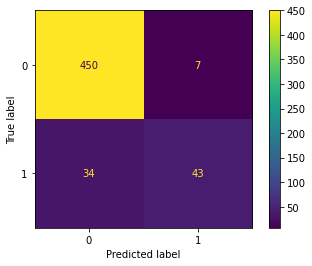

,Accuracy,Precision,Recall,F1
0,0.923221,0.86,0.558442,0.677165


In [46]:
evaluate(rf_model, x_val, y_val)

### Tune multiple hyperparameters


In [48]:
# redefine the function usng a wider range of hyperparameters
def objective(search_space):
    model = RandomForestClassifier(**search_space, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    fn = np.sum(np.logical_and(y_val == 1, y_pred == 0))
    return {'loss': fn, 'status': STATUS_OK}

# new search space
search_space={'n_estimators':hp.randint('n_estimators',200,1000),
              
              'max_depth': hp.randint('max_depth',3,7),           
            
            'min_samples_split':hp.uniform('min_samples_split',0, 1),   
             'min_samples_leaf':hp.randint('min_samples_leaf',1,10),
              
            "criterion": hp.choice("criterion", ["gini", "entropy"]),
                
           "max_features":hp.choice("max_features",["sqrt", "log2"]),}

# implement Hyperopt
best_params = fmin(fn=objective, space=search_space, algo=algorithm,
                   max_evals=30)


100%|██████████| 30/30 [00:24<00:00,  1.25trial/s, best loss: 48.0]


In [49]:
best_params

{'criterion': 0,
 'max_depth': 4,
 'max_features': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 0.003472537325904808,
 'n_estimators': 812}

In [51]:
new_params = space_eval(search_space, best_params)

new_params

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 0.003472537325904808,
 'n_estimators': 812}

In [52]:
rf2 = RandomForestClassifier(**new_params, random_state = 0, n_jobs = -1,
                           class_weight = {0:0.1, 1:0.9})
rf_model2 = train(rf2, x_train, y_train)

Train Accuracy: 0.8714821763602252


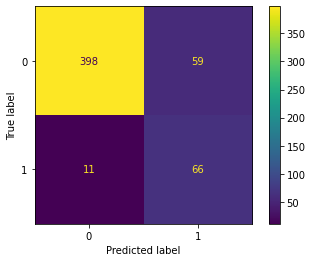

,Accuracy,Precision,Recall,F1
0,0.868914,0.528,0.857143,0.653465


In [53]:
evaluate(rf_model2, x_val, y_val)

In [54]:
from hpsklearn import any_classifier, any_preprocessing
from hpsklearn import HyperoptEstimator

In [55]:
HyperoptEstimator(classifier = any_classifier, 
                  preprocessing = any_preprocessing)

hyperopt_estimator(classifier=<function any_classifier at 0x7fc174f534c0>,
                   preprocessing=<function any_preprocessing at 0x7fc174f53790>)

In [ ]:
rf = RandomForestClassifier()

gb = GradientBoostingClassifier()

models = [rf, gb, log_reg]

acc = []

for model in models:
    scores = cross_val_score(model, x, y, cv = 5)
    acc.append(np.mean(scores))

In [ ]:
ind = np.argmax(acc)